<a href="https://colab.research.google.com/github/Amirgh8080/My-SLFEND/blob/main/SLFEND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load JSON file
fake_path = "/content/drive/MyDrive/Datasets/fake_release_all.json"
real_path = "/content/drive/MyDrive/Datasets/real_release_all.json"
real =  pd.read_json(real_path,lines=True)
fake = pd.read_json(fake_path,lines=True)



<ipython-input-12-f4bbdd51172f>:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  fake = pd.read_json(fake_path,lines=True)
<ipython-input-12-f4bbdd51172f>:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  fake = pd.read_json(fake_path,lines=True)
<ipython-input-12-f4bbdd51172f>:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To reta

In [ ]:
fake.head()

,id,content,comments,timestamp,piclists,label,category
0,4305466076787628,【让电脑提速的小方法】开始菜单里点击&quot;运行&quot;，输入gpedit.msc指...,"['转发微博', '回复@Bruce回忆:怎么改回来的，怎么改回去。', '走起', '转发...",1970-01-17 01:51:03.240,[//ww2.sinaimg.cn/orj360/a864f8c4jw1ecashyx78n...,1,科技
1,4305411953871301,也许小小常识会捡回一条命！,['易拉罐从仓库运到商店没清洗，若被老鼠尿污染，鼠尿含有致命的细旋体病毒会致人死命！[话筒]...,1970-01-16 18:10:51.060,[//ww1.sinaimg.cn/orj360/70a39125jw1e21bgq8vqf...,1,医药健康
2,4305499757579707,8月18日株洲神农谷玩的5条人命瞬间没了！触目惊心、发人深省！惨痛的教训，触目惊心、发人深省...,"['明明是国外，去年就看过了//@段郎说事:在大自然面前，人真的不堪一击[蜡烛]', '5秒...",1970-01-16 13:59:55.020,[],1,灾难事故
3,4304876248693675,#国外爸爸嫁女儿#2014年7月10日在深圳市医院治疗的广西某男子，晚上用手机看电影手机突然...,"['P过头了亲', '吓哭！', '@Nacy-yeug', '回复@Ar-Black努力奋...",1970-01-17 07:03:33.600,[//ww3.sinaimg.cn/orj360/e3575919jw1ej9oqi7j8q...,1,医药健康
4,4304876248693675,剖腹产对孩子影响很大的!!!我出生的时候是低横胎位，剖腹产出来的，从小就体质很差，必须要每天...,['回复@九命-巨乳即正义:H₂O：氧化氢、一氧化二氢、氧化二氢（以上为正常形式读法）、氢氧...,1970-01-17 07:06:18.900,[],1,医药健康


In [ ]:


# Create a 'label' column in both DataFrames
real['label'] = 0
fake['label'] = 1

# Concatenate the DataFrames
df = pd.concat([real, fake], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df.head())


                  id                                            content  \
0   4251874947582747  【三星折叠屏原型机曝光：双屏设计/非柔性屏】网友@黎启lee晒出三星的ProjcetV可折叠...   
1   3910910819305524  【能电鱼，更能电力找鱼：别以为电鳗只有把鱼电晕一招！】电鳗2米长的身体里有许多专门发电的细胞...   
2  22111031258047496  在iPad2发售几小时后，国外玩家就已经对它进行了拆解。想了解如此轻薄的机身如何容纳下这么多...   
3   3833680848014537               #乐享时光#现在科学家都这么闲了吗?谢谢你告诉我这么重要的结论啊！（转）   
4   4228090735484805  全国首家“无人银行”亮相大堂经理是智能机器人银行里没有忙碌的工作人员和拥挤的排队客户，而是各...   

                                            comments           timestamp  \
0  想起来排线这个东西 挺丑的 不会，怕王炸 前几年的东西吧 中興不是出過？ 丑死了 别恶心人啦... 2018-06-17 04:24:06   
1  呵呵 想养两条当充电宝······ 以后漫威可能会出一个电鳗侠了 食人鱼克星 没人研究电鳗的... 2015-11-19 07:14:23   
2  哇~~~看不懂...[晕] 这种手贱要鼓励！要支持！ 哎 不得不佩服苹果的工艺啊 拆解控们看... 2011-03-12 03:02:12   
3  23333 [doge]哪本书这是 [晕] 哈哈哈 好逗 哦 Repost 可是根据马克思哲... 2015-04-20 04:30:03   
4  补赞了 [赞啊][赞啊][赞啊] 人工智能越来越普及了 晚上好，最近太忙了 高科技 哈哈哈 ... 2018-04-12 13:14:00   

                                            piclists  label category  
0  [//ww4.sinaimg.cn/

In [ ]:

df = df[['content', 'label']]

# Rename the 'content' column to 'Text'
df = df.rename(columns={'content': 'Text'})

print(df.head())


                                                Text  label
0  【三星折叠屏原型机曝光：双屏设计/非柔性屏】网友@黎启lee晒出三星的ProjcetV可折叠...      0
1  【能电鱼，更能电力找鱼：别以为电鳗只有把鱼电晕一招！】电鳗2米长的身体里有许多专门发电的细胞...      0
2  在iPad2发售几小时后，国外玩家就已经对它进行了拆解。想了解如此轻薄的机身如何容纳下这么多...      0
3               #乐享时光#现在科学家都这么闲了吗?谢谢你告诉我这么重要的结论啊！（转）      0
4  全国首家“无人银行”亮相大堂经理是智能机器人银行里没有忙碌的工作人员和拥挤的排队客户，而是各...      0


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Datasets/Fake_Real_Data.csv'
df = pd.read_csv(path)

## Preprocess

In [ ]:
df['label'] = df['label'].map({'Real': 0, 'Fake': 1})
df.head()


,Text,label
0,【三星折叠屏原型机曝光：双屏设计/非柔性屏】网友@黎启lee晒出三星的ProjcetV可折叠...,NaN
1,【能电鱼，更能电力找鱼：别以为电鳗只有把鱼电晕一招！】电鳗2米长的身体里有许多专门发电的细胞...,NaN
2,在iPad2发售几小时后，国外玩家就已经对它进行了拆解。想了解如此轻薄的机身如何容纳下这么多...,NaN
3,#乐享时光#现在科学家都这么闲了吗?谢谢你告诉我这么重要的结论啊！（转）,NaN
4,全国首家“无人银行”亮相大堂经理是智能机器人银行里没有忙碌的工作人员和拥挤的排队客户，而是各...,NaN


In [ ]:
def preprocess_data(df, text_column, label_column):
    """Preprocess data, converting text and labels to lists."""
    df = df.dropna(subset=[text_column, label_column])
    df[label_column] = df[label_column].apply(lambda x: 1 if x == 'Real' else 0)
    texts = df[text_column].tolist()
    labels = df[label_column].tolist()
    return texts, labels

In [ ]:
print(df.shape)
print(df['label'].value_counts())


(9128, 2)
label
0    4640
1    4488
Name: count, dtype: int64


# Current

## Original Paper

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Model Architecture ---
class BertEmbedding(nn.Module):
    """BERT encoder to extract textual embeddings."""
    def __init__(self, bert_model_name='bert-base-uncased'):
        super(BertEmbedding, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # Return hidden states [batch_size, seq_len, hidden_size]

class LeapGRU(nn.Module):
    """Leap GRU module for skipping irrelevant words."""
    def __init__(self, input_size, hidden_size):
        super(LeapGRU, self).__init__()
        self.gru = nn.GRUCell(input_size, hidden_size)
        self.hidden_size = hidden_size
        self.mlp = nn.Sequential(
            nn.Linear(hidden_size * 2 + input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        outputs = []

        for t in range(seq_len):
            ht = self.gru(x[:, t, :], h)
            context = torch.cat([h, ht, x[:, t, :]], dim=-1)
            skip_prob = self.mlp(context)[:, 1]  # Skip probability based on context

            if skip_prob.mean() >= 0.5:
                h = ht  # Update hidden state only if skip_prob is high

            outputs.append(h)

        outputs = torch.stack(outputs, dim=1)
        return outputs  # [batch_size, seq_len, hidden_size]

class MembershipFunction(nn.Module):
    """Generates soft labels for multi-domain fake news detection."""
    def __init__(self, input_size, hidden_size):
        super(MembershipFunction, self).__init__()
        self.leap_gru = LeapGRU(input_size, hidden_size)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 9),  # 9 domain labels (based on the paper)
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        leap_output = self.leap_gru(x)
        h = leap_output[:, -1, :]  # Final hidden state
        soft_labels = self.mlp(h)
        return soft_labels  # Soft labels [batch_size, 9]

class TextCNN(nn.Module):
    """Text CNN for feature extraction."""
    def __init__(self, input_size, num_classes):
        super(TextCNN, self).__init__()
        self.convs = nn.ModuleList([
            nn.Conv2d(1, 100, (k, input_size)) for k in [3, 4, 5]
        ])
        self.fc = nn.Linear(300, num_classes)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.unsqueeze(1)  # [batch_size, 1, seq_len, input_size]
        conv_results = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(result, result.size(2)).squeeze(2) for result in conv_results]
        cat = torch.cat(pooled, dim=1)
        out = self.dropout(self.fc(cat))
        return out  # [batch_size, num_classes]

class DomainGate(nn.Module):
    """Applies domain gate logic to weigh experts' outputs."""
    def __init__(self, input_size):
        super(DomainGate, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 9),  # 9 domains
            nn.Softmax(dim=-1)
        )

    def forward(self, g):
        alpha = self.mlp(g)
        return alpha  # Soft domain weights [batch_size, 9]

class Classifier(nn.Module):
    """Final classifier for detecting fake news."""
    def __init__(self, input_size):
        super(Classifier, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(input_size, 384),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(384, 1),
            nn.Sigmoid()
        )

    def forward(self, v):
        return self.mlp(v).squeeze(-1)  # Output fake/real label [batch_size]

class SLFENDModel(nn.Module):
    """Soft-label multi-domain fake news detection (SLFEND) model."""
    def __init__(self):
        super(SLFENDModel, self).__init__()
        self.bert = BertEmbedding()
        self.membership_function = MembershipFunction(input_size=768, hidden_size=256)
        self.experts = nn.ModuleList([TextCNN(768, 128) for _ in range(9)])  # 9 expert networks
        self.domain_gate = DomainGate(9)
        self.classifier = Classifier(128)  # Classify final weighted output

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids, attention_mask)  # [batch_size, seq_len, 768]
        soft_labels = self.membership_function(bert_output)  # [batch_size, 9]

        # Pass through expert networks
        expert_outputs = [expert(bert_output) for expert in self.experts]
        expert_outputs = torch.stack(expert_outputs, dim=1)  # [batch_size, 9, 128]

        # Apply domain gate weights
        alpha = self.domain_gate(soft_labels).unsqueeze(-1)  # [batch_size, 9, 1]
        v = (expert_outputs * alpha).sum(dim=1)  # Weighted sum of expert outputs

        # Classification
        y_hat = self.classifier(v)
        return y_hat  # [batch_size]



## Train paper

Original dataset class distribution:

 {0: 4640, 1: 4488}

Train Dataset
-------------------------------
Size: 6389
Class 0: 3248 samples
Class 1: 3141 samples
-------------------------------


Validation Dataset
-------------------------------
Size: 1369
Class 0: 696 samples
Class 1: 673 samples
-------------------------------


Test Dataset
-------------------------------
Size: 1370
Class 0: 696 samples
Class 1: 674 samples
-------------------------------

Epoch 1/5 - Loss: 0.5875 - Accuracy: 0.6914
Epoch 2/5 - Loss: 0.4713 - Accuracy: 0.7748
Epoch 3/5 - Loss: 0.3814 - Accuracy: 0.8267
Epoch 4/5 - Loss: 0.3107 - Accuracy: 0.8628
Epoch 5/5 - Loss: 0.2490 - Accuracy: 0.8989

Evaluation Metrics:
-------------------------------
Accuracy: 0.8328
Precision: 0.8138
Recall: 0.8561
F1 Score: 0.8344
-------------------------------



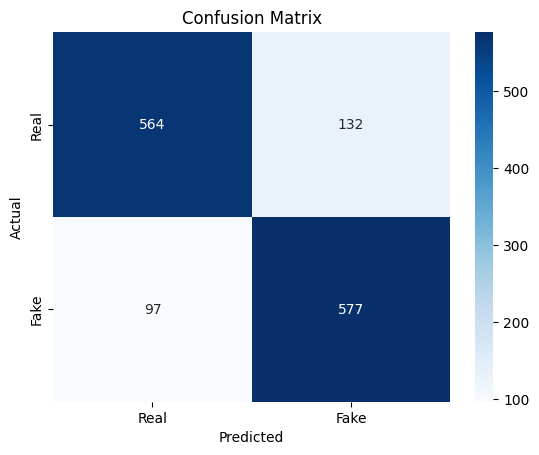

In [ ]:


print("Original dataset class distribution:")
print("\n", dict(zip(*np.unique(df.label, return_counts=True))))

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df.Text, df.label, test_size=0.3, stratify=df.label, random_state=42)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

def print_dataset_info(name, texts, labels):
    print(f"\n{name} Dataset")
    print("-------------------------------")
    print(f"Size: {len(texts)}")
    class_dist = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in class_dist.items():
        print(f"Class {key}: {value} samples")
    print("-------------------------------\n")

print_dataset_info("Train", train_texts, train_labels)
print_dataset_info("Validation", val_texts, val_labels)
print_dataset_info("Test", test_texts, test_labels)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=512, return_tensors="pt")
        self.labels = torch.tensor(list(labels), dtype=torch.float)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'label': self.labels[idx]
        }

train_dataset = NewsDataset(train_texts, train_labels)
val_dataset = NewsDataset(val_texts, val_labels)
test_dataset = NewsDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load SLFEND Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SLFENDModel().to(device)


def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=2e-5):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss, total_acc = 0, 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels.squeeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = (outputs > 0.5).float().cpu().numpy()
            acc = accuracy_score(labels.cpu().numpy(), preds)
            total_acc += acc
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {total_loss/len(train_loader):.4f} - Accuracy: {total_acc/len(train_loader):.4f}")

def evaluate_model(model, data_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device).unsqueeze(1)
            outputs = model(input_ids, attention_mask)
            preds = (outputs > 0.5).float().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    print("\nEvaluation Metrics:")
    print("-------------------------------")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-------------------------------\n")
    return all_labels, all_preds

# Train model
train_model(model, train_loader, val_loader, num_epochs=5)

# Evaluate on test set
all_labels, all_preds = evaluate_model(model, test_loader)

# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Using Transformer instead of TextCNN

In [ ]:

# ----------------------
# 1. Leap GRU Component
# ----------------------
class LeapGRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, cnn_filters=64):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.reverse_gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.cnn = nn.Conv1d(input_dim, cnn_filters, kernel_size=3, padding=1)

        # MLP for skip decision
        self.mlp = nn.Sequential(
            nn.Linear(input_dim + hidden_dim + (hidden_dim + cnn_filters), 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softmax(dim=-1)
        )
        self.hidden_dim = hidden_dim
        self.cnn_filters = cnn_filters

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        h_prev = torch.zeros(1, batch_size, self.hidden_dim).to(x.device)
        reverse_out, _ = self.reverse_gru(torch.flip(x, dims=[1]))
        reverse_out = torch.flip(reverse_out, dims=[1])

        cnn_out = self.cnn(x.permute(0,2,1)).permute(0,2,1)

        outputs = []
        for t in range(seq_len):
            if t == 0:
                f_precede = torch.zeros(batch_size, self.hidden_dim).to(x.device)
            else:
                _, f_precede = self.gru(x[:, :t, :], h_prev)
                f_precede = f_precede.squeeze(0)

            if t < seq_len - 1:
                f_follow_gru = reverse_out[:, t+1, :]
                f_follow_cnn = cnn_out[:, t+1, :]
                f_follow = torch.cat([f_follow_gru, f_follow_cnn], dim=-1)
            else:
                f_follow = torch.zeros(batch_size, self.hidden_dim + self.cnn_filters).to(x.device)

            combined = torch.cat([x[:, t, :], f_precede, f_follow], dim=-1)
            pi_t = self.mlp(combined)

            if pi_t[0, 1] >= 0.5:
                _, h_prev = self.gru(x[:, t:t+1, :], h_prev)
                outputs.append(h_prev.squeeze(0))
            else:
                outputs.append(h_prev.squeeze(0))

        return torch.stack(outputs, dim=1)

# --------------------------
# 2. Membership Function
# --------------------------
class MembershipFunction(nn.Module):
    def __init__(self, input_dim, num_domains=9):
        super().__init__()
        self.leap_gru = LeapGRU(input_dim, hidden_dim=128)
        self.mlp = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, num_domains),
            nn.Softmax(dim=-1)
        )

    def forward(self, bert_embeddings):
        leap_out = self.leap_gru(bert_embeddings)
        pooled = torch.mean(leap_out, dim=1)
        soft_labels = self.mlp(pooled)
        return soft_labels

# --------------------------
# 3. Domain Gate
# --------------------------
class DomainGate(nn.Module):
    def __init__(self, num_domains=9, expert_dim=192):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(num_domains, 64),
            nn.ReLU(),
            nn.Linear(64, num_domains),
            nn.Softmax(dim=-1)
        )

    def forward(self, soft_labels):
        return self.mlp(soft_labels)

# --------------------------
# 4. Full SLFEND Model with Transformer
# --------------------------
class NewSLFEND(nn.Module):
    def __init__(self, num_domains=9):
        super().__init__()
        self.num_domains = num_domains
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.membership = MembershipFunction(768, num_domains)

        # Learnable domain tokens and transformer
        self.domain_tokens = nn.Parameter(torch.randn(1, num_domains, 768))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=768,
            nhead=8,
            dim_feedforward=3072,
            dropout=0.1
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=3)
        self.domain_projection = nn.Linear(768, 192)

        self.domain_gate = DomainGate(num_domains)
        self.classifier = nn.Sequential(
            nn.Linear(192, 384),
            nn.ReLU(),
            nn.Linear(384, 1),
            nn.Sigmoid()
        )

    def forward(self, input_ids, attention_mask):
        # BERT Embeddings
        bert_output = self.bert(input_ids, attention_mask)
        embeddings = bert_output.last_hidden_state
        batch_size = embeddings.size(0)

        # Soft Labels via Membership Function
        soft_labels = self.membership(embeddings)

        # Combine BERT embeddings with domain tokens
        domain_tokens = self.domain_tokens.expand(batch_size, -1, -1)
        combined = torch.cat([embeddings, domain_tokens], dim=1)

        # Transformer processing
        combined_permuted = combined.permute(1, 0, 2)
        transformer_output = self.transformer(combined_permuted)
        transformer_output = transformer_output.permute(1, 0, 2)

        # Extract and project domain features
        domain_features = transformer_output[:, -self.num_domains:, :]
        expert_outputs = self.domain_projection(domain_features)

        # Domain gating and classification
        alpha = self.domain_gate(soft_labels).unsqueeze(-1)
        combined = (expert_outputs * alpha).sum(dim=1)
        y_pred = self.classifier(combined)

        return y_pred.squeeze()

## Train New Model

Original dataset class distribution:

 {0: 4640, 1: 4488}

Train Dataset
-------------------------------
Size: 6389
Class 0: 3248 samples
Class 1: 3141 samples
-------------------------------


Validation Dataset
-------------------------------
Size: 1369
Class 0: 696 samples
Class 1: 673 samples
-------------------------------


Test Dataset
-------------------------------
Size: 1370
Class 0: 696 samples
Class 1: 674 samples
-------------------------------



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/5 - Loss: 0.5867 - Accuracy: 0.6900
Epoch 2/5 - Loss: 0.4664 - Accuracy: 0.7731
Epoch 3/5 - Loss: 0.3869 - Accuracy: 0.8195
Epoch 4/5 - Loss: 0.3278 - Accuracy: 0.8603
Epoch 5/5 - Loss: 0.2807 - Accuracy: 0.8844

Evaluation Metrics:
-------------------------------
Accuracy: 0.8401
Precision: 0.8245
Recall: 0.8576
F1 Score: 0.8407
-------------------------------



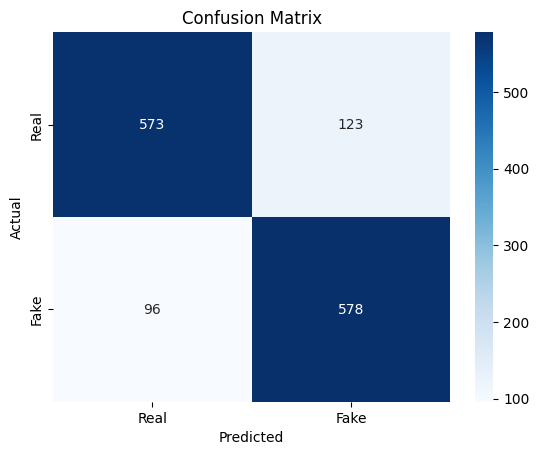

In [ ]:


print("Original dataset class distribution:")
print("\n", dict(zip(*np.unique(df.label, return_counts=True))))

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df.Text, df.label, test_size=0.3, stratify=df.label, random_state=42)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

def print_dataset_info(name, texts, labels):
    print(f"\n{name} Dataset")
    print("-------------------------------")
    print(f"Size: {len(texts)}")
    class_dist = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in class_dist.items():
        print(f"Class {key}: {value} samples")
    print("-------------------------------\n")

print_dataset_info("Train", train_texts, train_labels)
print_dataset_info("Validation", val_texts, val_labels)
print_dataset_info("Test", test_texts, test_labels)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=512, return_tensors="pt")
        self.labels = torch.tensor(list(labels), dtype=torch.float)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'label': self.labels[idx]
        }

train_dataset = NewsDataset(train_texts, train_labels)
val_dataset = NewsDataset(val_texts, val_labels)
test_dataset = NewsDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load SLFEND Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewSLFEND().to(device)


def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=2e-5):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss, total_acc = 0, 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels.squeeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = (outputs > 0.5).float().cpu().numpy()
            acc = accuracy_score(labels.cpu().numpy(), preds)
            total_acc += acc
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {total_loss/len(train_loader):.4f} - Accuracy: {total_acc/len(train_loader):.4f}")

def evaluate_model(model, data_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device).unsqueeze(1)
            outputs = model(input_ids, attention_mask)
            preds = (outputs > 0.5).float().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    print("\nEvaluation Metrics:")
    print("-------------------------------")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-------------------------------\n")
    return all_labels, all_preds

# Train model
train_model(model, train_loader, val_loader, num_epochs=5)

# Evaluate on test set
all_labels, all_preds = evaluate_model(model, test_loader)

# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
